<a href="https://colab.research.google.com/github/daehkim/pair-trading/blob/master/Backtesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS7641 Machine Learning
*Application of Machine Learning in Pairs Trading*

In [2]:
import pandas as pd
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt

## Generate the input data

### Price history

Price history will be about only one stock.

In [3]:
# Import training dataset
training_set = pd.read_csv("training_data.csv")

# Remove all the data except the pairs we choose
pairs_list = [[83186, 89003],
                [81294, 82581],
                [53640, 83597],
                [43350, 82651],
                [12781, 48531],
                [44644, 90458],
                [21742, 76639],
                [51633, 58819],
                [24969, 24985],
                [81294, 83186],
                [42585, 83621],
                [10395, 53640],
                [23931, 48531],
                [60186, 81095],
                [13856, 48531],
                [16548, 81577]
              ]

for i in range(len(pairs_list)):
    if i==0:
        pairs_training_set = \
            training_set.loc[training_set['PERMNO']==pairs_list[0][0]]
        pairs_training_set = pd.concat([pairs_training_set, 
                   training_set.loc[training_set['PERMNO']==pairs_list[0][1]]])
    else:
        pairs_training_set = pd.concat([pairs_training_set,
                   training_set.loc[training_set['PERMNO']==pairs_list[i][0]]])
        pairs_training_set = pd.concat([pairs_training_set,
                   training_set.loc[training_set['PERMNO']==pairs_list[i][1]]])

training_set = pairs_training_set
training_set.head(3)

,PERMNO,price_20070103,price_20070104,price_20070105,price_20070108,price_20070109,price_20070110,price_20070111,price_20070112,price_20070116,price_20070117,price_20070118,price_20070119,price_20070122,price_20070123,price_20070124,price_20070125,price_20070126,price_20070129,price_20070130,price_20070131,price_20070201,price_20070202,price_20070205,price_20070206,price_20070207,price_20070208,price_20070209,price_20070212,price_20070213,price_20070214,price_20070215,price_20070216,price_20070220,price_20070221,price_20070222,price_20070223,price_20070226,price_20070227,price_20070228,...,at_turn_2012-09,at_turn_2012-10,at_turn_2012-11,at_turn_2012-12,at_turn_2013-01,at_turn_2013-02,at_turn_2013-03,at_turn_2013-04,at_turn_2013-05,at_turn_2013-06,at_turn_2013-07,at_turn_2013-08,at_turn_2013-09,at_turn_2013-10,at_turn_2013-11,at_turn_2013-12,at_turn_2014-01,at_turn_2014-02,at_turn_2014-03,at_turn_2014-04,at_turn_2014-05,at_turn_2014-06,at_turn_2014-07,at_turn_2014-08,at_turn_2014-09,at_turn_2014-10,at_turn_2014-11,at_turn_2014-12,at_turn_2015-01,at_turn_2015-02,at_turn_2015-03,at_turn_2015-04,at_turn_2015-05,at_turn_2015-06,at_turn_2015-07,at_turn_2015-08,at_turn_2015-09,at_turn_2015-10,at_turn_2015-11,at_turn_2015-12
1187,83186,63.37,63.05,63.07,65.73,66.17,66.73,67.64,67.75,67.48,68.10,67.61,67.76,67.95,68.06,70.50,70.38,69.80,70.77,70.20,70.48,70.97,71.84,71.37,71.48,71.89,71.94,72.22,71.80,71.90,72.53,72.92,72.62,73.37,73.91,73.56,74.08,73.16,70.78,70.42,...,0.738,0.738,0.730,0.730,0.730,0.755,0.755,0.755,0.758,0.758,0.758,0.774,0.774,0.774,0.798,0.798,0.798,0.818,0.818,0.818,0.843,0.843,0.843,0.875,0.875,0.875,0.900,0.900,0.900,0.911,0.911,0.911,0.840,0.840,0.840,0.758,0.758,0.758,0.661,0.661
1572,89003,40.61,40.48,40.34,40.68,40.98,41.32,41.42,41.29,41.31,41.55,41.51,41.60,41.51,41.55,42.57,42.00,42.00,41.70,42.16,42.52,42.54,43.03,43.15,43.23,45.20,45.02,45.40,45.14,45.22,46.75,47.00,47.55,47.55,46.97,47.00,47.04,46.79,45.29,45.92,...,0.412,0.412,0.417,0.417,0.417,0.424,0.424,0.424,0.428,0.428,0.428,0.434,0.434,0.434,0.432,0.432,0.432,0.441,0.441,0.441,0.433,0.433,0.433,0.434,0.434,0.434,0.444,0.444,0.444,0.451,0.451,0.451,0.448,0.448,0.448,0.448,0.448,0.448,0.446,0.446
1110,81294,34.33,34.19,33.35,33.44,33.55,32.73,33.29,33.44,32.85,32.85,32.55,33.11,32.71,32.60,32.81,32.75,32.99,32.99,32.99,32.93,33.10,33.25,33.07,33.03,33.08,33.13,32.77,32.86,33.10,33.16,33.10,33.01,33.39,33.81,33.42,33.31,33.81,32.20,31.90,...,1.202,1.181,1.181,1.181,1.173,1.173,1.173,1.163,1.163,1.163,1.161,1.161,1.161,1.181,1.181,1.181,1.152,1.152,1.152,1.158,1.158,1.158,1.152,1.152,1.152,1.142,1.142,1.142,1.140,1.140,1.140,1.144,1.144,1.144,1.136,1.136,1.136,1.101,1.101,1.101


In [64]:
# Filtering the table only for the price history
filter_col = ['PERMNO']
filter_col2 = [col for col in training_set if col.startswith('price_')]
filter_col.extend(filter_col2)

training_set_price = training_set[filter_col]
training_set_price = training_set_price.drop(columns=['PERMNO'])
training_set_price.head(3)

,price_20070103,price_20070104,price_20070105,price_20070108,price_20070109,price_20070110,price_20070111,price_20070112,price_20070116,price_20070117,price_20070118,price_20070119,price_20070122,price_20070123,price_20070124,price_20070125,price_20070126,price_20070129,price_20070130,price_20070131,price_20070201,price_20070202,price_20070205,price_20070206,price_20070207,price_20070208,price_20070209,price_20070212,price_20070213,price_20070214,price_20070215,price_20070216,price_20070220,price_20070221,price_20070222,price_20070223,price_20070226,price_20070227,price_20070228,price_20070301,...,price_20151104,price_20151105,price_20151106,price_20151109,price_20151110,price_20151111,price_20151112,price_20151113,price_20151116,price_20151117,price_20151118,price_20151119,price_20151120,price_20151123,price_20151124,price_20151125,price_20151127,price_20151130,price_20151201,price_20151202,price_20151203,price_20151204,price_20151207,price_20151208,price_20151209,price_20151210,price_20151211,price_20151214,price_20151215,price_20151216,price_20151217,price_20151218,price_20151221,price_20151222,price_20151223,price_20151224,price_20151228,price_20151229,price_20151230,price_20151231
1187,63.37,63.05,63.07,65.73,66.17,66.73,67.64,67.75,67.48,68.10,67.61,67.76,67.95,68.06,70.50,70.38,69.80,70.77,70.20,70.48,70.97,71.84,71.37,71.48,71.89,71.94,72.22,71.80,71.90,72.53,72.92,72.62,73.37,73.91,73.56,74.08,73.16,70.78,70.42,70.94,...,124.70,124.21,124.74,123.80,123.52,123.51,121.06,119.39,121.32,120.63,121.00,122.39,123.00,122.20,123.40,123.74,124.42,122.28,122.57,121.33,119.86,121.47,120.11,118.86,115.60,116.40,112.99,113.61,113.94,116.56,116.14,114.89,115.32,114.54,115.16,115.10,115.36,116.65,115.48,114.06
1572,40.61,40.48,40.34,40.68,40.98,41.32,41.42,41.29,41.31,41.55,41.51,41.60,41.51,41.55,42.57,42.00,42.00,41.70,42.16,42.52,42.54,43.03,43.15,43.23,45.20,45.02,45.40,45.14,45.22,46.75,47.00,47.55,47.55,46.97,47.00,47.04,46.79,45.29,45.92,46.29,...,65.54,66.18,67.19,66.35,66.51,67.08,66.31,65.10,65.50,65.61,66.12,66.08,66.41,65.55,64.78,64.53,64.72,63.67,64.49,64.98,64.07,65.04,63.51,63.05,63.45,62.88,61.20,61.11,61.62,62.03,59.88,58.52,59.16,59.85,61.19,61.11,61.00,61.59,60.99,60.60
1110,34.33,34.19,33.35,33.44,33.55,32.73,33.29,33.44,32.85,32.85,32.55,33.11,32.71,32.60,32.81,32.75,32.99,32.99,32.99,32.93,33.10,33.25,33.07,33.03,33.08,33.13,32.77,32.86,33.10,33.16,33.10,33.01,33.39,33.81,33.42,33.31,33.81,32.20,31.90,32.08,...,96.91,96.95,96.39,95.64,96.46,96.76,95.03,95.21,96.40,96.79,98.35,98.28,98.48,99.80,100.03,100.66,100.70,98.77,99.50,99.34,98.30,99.52,100.27,100.43,100.19,99.32,97.50,98.32,100.25,102.59,102.71,99.51,99.97,99.09,99.10,99.70,99.69,101.19,101.11,98.65


In [95]:
class Backtesting():
    """
    Run the backtesting and track the total property history
    """

    def __init__(self, z_score_list, stop_loss=3, buy_z=2, sell_z=-0.5, 
                 total_money=100000):
        self.pairs_num = z_score_list.shape[0]
        self.total_time = z_score_list.shape[1]
        self.stop_loss = stop_loss
        self.buy_z = buy_z
        self.sell_z = sell_z

        self.total_stock = np.zeros((2 * self.pairs_num))
        self.total_inverse = np.zeros((2 * self.pairs_num))

    def trade_decision(self, z_score, pair_num):
        """
        Args:
            z_score: scalar z_score value
            pair_num: pair's number
        Return:
            stock: buy(+1), sell(-1), stop_loss(-2)
            inverse: buy(+1), sell(-1), stop_loss(-2)
        """

        stop_loss = self.stop_loss
        buy_z = self.buy_z
        sell_z = self.sell_z
        total_stock = self.total_stock[2 * pair_num]
        total_inverse = self.total_inverse[2 * pair_num]
        stock, inverse = 0, 0

        # Need to sell everything to stop loss
        if z_score >= stop_loss or z_score <= -1*stop_loss:
            stock, inverse = -2, -2

        # If the z-score is over the buy_z, buy the stock a
        elif z_score >= buy_z and total_stock == 0:
            stock, inverse = 1, 0
        
        # If the z-score below sell_z, sell all the stocks to make profit 
        elif z_score <= sell_z and total_stock > 0:
            stock, inverse = -1, 0

        # If the z-score below -1 * buy_z, buy the inverse a
        elif z_score <= -1 * buy_z and total_inverse == 0:
            stock, inverse = 0, 1

        # If the z-score above -1 * sell_z, sell the inverse a to make profit
        elif z_score >= -1 * sell_z and total_inverse > 0:
            stock, inverse = 0, -1
        
        return stock, inverse


    def cal_trade_vol(self, stock_signal, inv_signal, current_price):
        """
        Calculate the volume of trade we will trade

        Args:

        Return:
            
        """    
    

    def backtesting(self, z_score_list, price_a_list, price_b_list):
        """
        Return:
            final money
        """

        for t in range(self.total_time):

            for pair_num in range(self.pairs_num):
                z_score = z_score_list[pair_num]
            
                # Decide whether buy or sell stock a.
                stock_a, inverse_a = self.trade_decision(
                    z_score[t], pair_num)
                stock_b = inverse_a
                inverse_b = stock_a

                # Calculate the buy/sell volume
                stock_a_vol, inverse_a_vol = self.cal_trade_vol(
                    stock_a, inverse_a, price_a_list[t])
                stock_b_vol, inverse_b_vol = self.cal_trade_vol(
                    stock_b, inverse_b, price_b_list[t])
                

                # Calculate the trade result


################################################################################

# Read the z-score history list
with open('z_score_history.npy', 'rb') as infile:
    z_score_list = np.load(infile)
price_a_list = training_set_price.to_numpy()[:, 700:]
price_b_list = training_set_price.to_numpy()[:, 700:]

BT = Backtesting(z_score_list, total_money = 100000)
BT.backtesting(z_score_list, price_a_list, price_b_list)


### Trade history

Check the trade history data in here.
We generated the random data for the backtesting function test.



In [79]:
# Generate the trade history based on the z-score history
def gen_trade_history(z_score_history, price_a_history, price_b_history, 
                      total_money, buy_z=2, sell_z=-0.5, stop_loss=3):
    """
    * input: z_score_hisotry (T)
    * output: trade_history_a (4xT), trade_history_b (4xT)
    * function: Generate the trade history based on the z-score history
    """

    def buy_vol():
        return 10

    def sell_vol():
        return 10

    if z_score_history.shape[0] != price_a_history.shape[0]:
        print("price_history dimension is different")
        return 0

    # Generate the trade_history based on the z-score
    # trade_history will have 4 rows, which are stock buy/sell and inverse buy/sell.
    total_len = len(z_score_history)
    stock_buy_list = [0] * total_len
    stock_sell_list = [0] * total_len
    inverse_buy_list = [0] * total_len
    inverse_sell_list = [0] * total_len
    total_stock = 0
    total_inverse = 0

    # For the total time history
    for i in range(total_len):

        # Stop loss
        if z_score_history[i] >= stop_loss or z_score_history[i] <= -1*stop_loss:
            stock_sell_list[i] = total_stock
            inverse_sell_list[i] = total_inverse
            total_stock = 0
            total_inverse = 0

        # If the z-score is over the buy_z, buy the stock a
        elif z_score_history[i] >= buy_z and total_stock == 0:
            stock_buy_list[i] = buy_vol()
            total_stock += buy_vol()
        
        # If the z-score below sell_z, sell all the stocks to make profit 
        elif z_score_history[i] <= sell_z and total_stock > 0:
            stock_sell_list[i] = sell_vol()
            total_stock -= sell_vol()

        # If the z-score below -1 * buy_z, buy the inverse a
        elif z_score_history[i] <= -1 * buy_z and total_inverse == 0:
            inverse_buy_list[i] = buy_vol()
            total_inverse += buy_vol()

        # If the z-score above -1 * sell_z, sell the inverse a to make profit
        elif z_score_history[i] >= -1 * sell_z and total_inverse > 0:
            inverse_sell_list[i] = sell_vol()
            total_inverse -= sell_vol()

    # Generate the stock a history
    trade_a_history = [stock_buy_list, stock_sell_list, inverse_buy_list, inverse_sell_list]
    trade_b_history = [inverse_buy_list, inverse_sell_list, stock_buy_list, stock_sell_list]
    trade_a_history = np.asarray(trade_a_history)
    trade_b_history = np.asarray(trade_b_history)

    return trade_a_history, trade_b_history

## How to use the code

1566
(4, 1566)
(4, 1566)


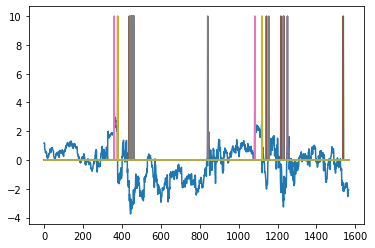

In [85]:
# Read the z-score history list
with open('z_score_history.npy', 'rb') as infile:
    z_score_history_list = np.load(infile)
price_a_history = training_set_price.to_numpy()[0][700:]
price_b_history = training_set_price.to_numpy()[1][700:]
total_money = 10000

# Generate the trade history about stock a and b
trade_a_history, trade_b_history = gen_trade_history(
    z_score_history_list[0], price_a_history, price_b_history, total_money)

# Plot the graph
T = z_score_history_list[0].shape[0]
print(T)
print(trade_a_history.shape)
print(trade_b_history.shape)
x = np.arange(T)
plt.plot(x, z_score_history_list[0])
for i in range(4):
    plt.plot(x, trade_a_history[i])
    plt.plot(x, trade_b_history[i])
plt.show()

## Backtesting

We will calculate the final price based on the trade_history and the price_history. After that, we can sum all the results we get.

In [ ]:
class Backtesting():
    """
    Run the backtesting and track the total property history
    """

    def __init__(self, initial_money, commission):
        self.total_money = initial_money
        self.commission = commission
        self.total_len = 0
        self.trade_results = {}

    def calculate_trade_results(self, stock_name, price_history, trade_history):
        """
        Args:
            price_history [$]: 1xT Stock price's history pandas dataframe.
            trade_history: 4xT Stock trade's history pandas dataframe
                (stock buy/sell, inverse buy/sell).
            commission: Broker commission when we sell the stock.
        Return:
            property_history [$]: 1xT property history.
        """

        # Initialize the variable
        price_history = price_history.to_numpy()[0]
        trade_history = trade_history.to_numpy()
        self.total_len = price_history.size
        total_len = self.total_len
        property_history = np.zeros((total_len))
        stock_holding = 0
        inverse_holding = 0

        # money_status is the amount of money used to buy the stock/inverse
        money_status = 0 
        stock_holding_history = np.zeros((total_len))
        inverse_holding_history = np.zeros((total_len))
        money_status_history = np.zeros((total_len))

        # Calculate the property_history for everyday and record on 
        # property_history array
        for i in range(total_len):

            # Calculate the stock price change
            if i > 0:
                price_fluctuation = (
                    price_history[i] - price_history[i-1]) / price_history[i-1]
                stock_holding *= (1 + price_fluctuation)
                inverse_holding *= (1 - price_fluctuation)

            # Buy the stock 
            if trade_history[0][i] > 0:
                # Sell all the inverse
                money_status += inverse_holding
                inverse_holding = 0

                # Buy the stock
                stock_price = trade_history[0][i] * price_history[i]
                money_status -= stock_price
                stock_holding += stock_price

            # Sell the stock
            elif trade_history[1][i] > 0:
                stock_price = trade_history[1][i] * price_history[i]
                if stock_price > stock_holding:
                    stock_price = stock_holding
                money_status += stock_price * (1 - self.commission)
                stock_holding -= stock_price

            # Buy the inverse
            if trade_history[2][i] > 0:
                # Sell all the stock
                money_status += stock_holding
                stock_holding = 0

                # Buy the inverse
                inverse_price = trade_history[2][i] * price_history[i]
                money_status -= inverse_price
                inverse_holding += inverse_price

            # Sell the inverse
            elif trade_history[3][i] > 0:
                inverse_price = trade_history[3][i] * price_history[i]
                if inverse_price > inverse_holding:
                    inverse_price = inverse_holding
                money_status += inverse_price * (1 - self.commission)
                inverse_holding -= inverse_price
            
            # Record history
            stock_holding_history[i] = stock_holding
            inverse_holding_history[i] = inverse_holding
            money_status_history[i] = money_status
            property_history[i] = money_status + stock_holding + inverse_holding

        # Plot the history for verification
        x = [i for i in range(total_len)]
        plt.plot(x, stock_holding_history, 'r', label='stock')
        plt.plot(x, inverse_holding_history, 'b', label='inverse')
        plt.plot(x, money_status_history, 'g', label='money_status')
        plt.legend()
        plt.show()

        return property_history
        
    def sum_trade_results(self):
        """
        Args: 
            self.trade_results
        Return:
            Sum of all the trades' result
        """
        
        total_property_history = np.zeros(self.total_len)
        keys = [key for key in self.trade_results]

        for key in self.trade_results:
            total_property_history += self.trade_results[key]

        return total_property_history

RANDOM1


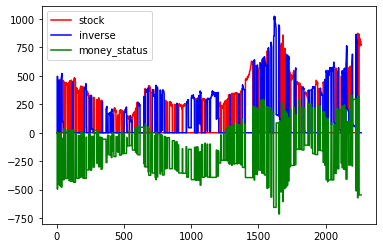

RANDOM2


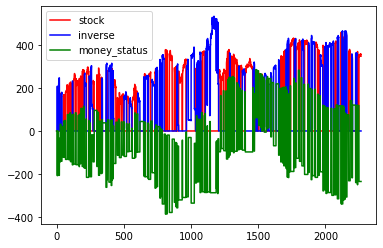

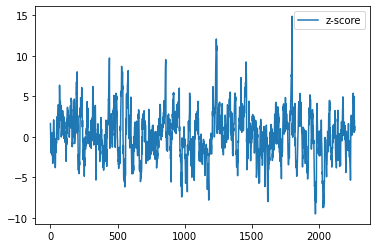

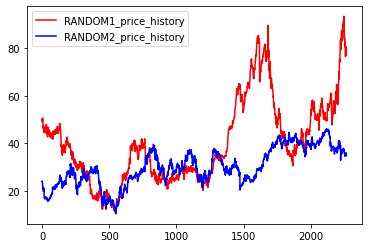

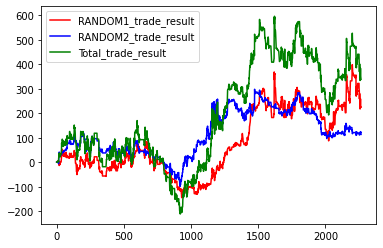

Final Money: 10338.147145285131


In [ ]:
# Function verification

bt = Backtesting(initial_money = 10000, commission = 0.002)
print("RANDOM1")
bt.trade_results["RANDOM1"] = \
    bt.calculate_trade_results("RANDOM1", price_history, trade_history)
print("RANDOM2")
bt.trade_results["RANDOM2"] = \
    bt.calculate_trade_results("RANDOM2", price_history_2, trade_history)
bt.total_property = bt.sum_trade_results()

# Plot the z-score we generate for the test
plt.plot(x, z_score_list, label="z-score")
plt.legend()
plt.show()

# Plot the stock history
plt.plot(x, price_history.to_numpy()[0], 'r', label="RANDOM1_price_history")
plt.plot(x, price_history_2.to_numpy()[0], 'b', label="RANDOM2_price_history")
plt.legend()
plt.show()

# Plot the property history
x = [i for i in range(total_len)]
plt.plot(x, bt.trade_results["RANDOM1"], 'r', label="RANDOM1_trade_result")
plt.plot(x, bt.trade_results["RANDOM2"], 'b', label="RANDOM2_trade_result")
plt.plot(x, bt.total_property, 'g', label="Total_trade_result")
plt.legend()
plt.show()

print("Final Money: " + str(10000 + float(bt.total_property[-1])))